In [ ]:
import os
import sys
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

sys.path.append(os.path.dirname(os.path.abspath(os.getcwd())) + "/..")
if os.getcwd().endswith("Topic2"):
    os.chdir("..")
    print(f"Changed to {os.getcwd()}")

from codebase import load_odin_as_ml_dataset, plot_confusion_matrix, transport_modes_dict

Changed to c:\Users\toell\Documents\GitHub\Design-of-AI-driven-business-operation


Choose the transport modes you wish to include in the classification

In [ ]:
transport_modes_dict

{1: 'Passenger car',
 2: 'Train',
 3: 'Bus',
 4: 'Tram',
 5: 'Metro',
 6: 'Speed pedelec',
 7: 'Electric bicycle',
 8: 'Non-electric bicycle',
 9: 'On foot',
 10: 'Touring car',
 11: 'Delivery van',
 12: 'Truck',
 13: 'Camper',
 14: 'Taxi/Minibus',
 15: 'Agricultural vehicle',
 16: 'Motorcycle',
 17: 'Moped',
 18: 'Light moped',
 19: 'Mobility aid with motor',
 20: 'Mobility aid without motor',
 21: 'Skates/inline skates/kick scooter',
 22: 'Boat',
 23: 'Other with motor',
 24: 'Other without motor'}

In [12]:
modes_to_predict = [1, 8,]
# Load the dataset
X_train, X_test, y_train, y_test = load_odin_as_ml_dataset(
    years=[2022], 
    transport_modes_predict=modes_to_predict,
    )

[INFO] Loading ODiN data for years: [2022]
[INFO] Reading file: data\OdiN 2019-2023\OdiN 2022\ODiN2022_Databestand.csv
Loaded file from CSV
[INFO] Loaded 200,054 rows for 2022
[INFO] Total rows after concatenation: 200,054
[FILTER] Only-one-mode trips: 172,256 rows (filtered 27,798)
[FILTER] After ignore rules: 172,256 rows (filtered 0)
[DONE] Final dataset shape: (172256, 247)
Common labels: [1 8]


              precision    recall  f1-score   support

           1       0.88      0.89      0.88     14340
           8       0.78      0.76      0.77      7306

    accuracy                           0.85     21646
   macro avg       0.83      0.82      0.83     21646
weighted avg       0.84      0.85      0.84     21646



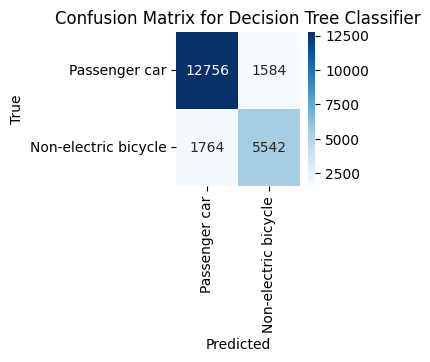

In [ ]:

# Use a decision tree classifier instead of random forest
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print metrics
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(
    cm, 
    classes=[transport_modes_dict[i] for i in modes_to_predict], 
    title="Confusion Matrix for Decision Tree Classifier",
    savename=None
)